#**KELOMPOK 8**#
Angggota :

Nida hasna imtisal (1800015074)

Aldila Dinanti Santoso Putri (1800015078)

#**IMPORT LIBRARY**#

In [165]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import  mean_squared_error, r2_score,plot_roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

#**IMPORT DATASET**#

In [166]:
df = pd.read_csv('https://raw.githubusercontent.com/Nidahasnai/Big-data/main/loan-train.csv')
df 
#show dataset train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [167]:
df1 = pd.read_csv('https://raw.githubusercontent.com/Nidahasnai/Big-data/main/loan-test.csv')
df1
#show dataset test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


#**MEMAHAMI DATASET**#

Variabel-variabel yang terdapat pada dataset ini adalah sebagai berikut:

Loan_ID :	Unique Loan ID

Gender :	Male/ Female

Married	: Applicant married (Y/N)

Dependents :	Number of dependents

Education :	Applicant Education (Graduate/ Under Graduate)

Self_Employed :	Self-employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome :	Coapplicant income

LoanAmount :	Loan amount in thousands

Loan_Amount_Term :	Term of a loan in months

Credit_History :	credit history meets guidelines

Property_Area :	Urban/ Semi-Urban/ Rural

Loan_Status	: Loan approved (Y/N)

#**SOAL UAS BIG DATA KLASIFIKASI**#

#**PERTANYAAN PERTAMA**#

KETERANGAN DATASET:

A. Jumlah Dataset

B. Jumlah Fitur

C. Keterangan Fitur

D. Tipe Fitur Data 

E. Apakah data sudah dibagi menjadi data training dan testing(YA/TIDAK) kalau IYA tuliskan 
jumlah data training dan testingnya

#**JAWABAN**#

# **Analisis Eksplorasi dataset**

In [168]:
df.shape

(614, 13)

In [169]:
df1.shape

(367, 12)

Sehingga jumlah dataset train diatas yaitu 614 baris dan 13 kolom. Dan jumlah dataset test yaitu 367 baris dan 12 kolom.

#**Variabel Pada Dataset**

In [170]:
df.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status'], dtype=object)

In [171]:
df1.columns.values

array(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area'], dtype=object)

Sehingga pada data train mempunyai 12 feature dan data test mempunyai 11 feature.

In [172]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [173]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Maka dari kedua dataset diatas memiliki 3 tipe, yaitu int64, float64, dan object.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [175]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [176]:
len(df)

614

In [177]:
len(df1)

367

Dari dataset diatas diketahui bahwa dataset tersebut  sudah dibagi menjadi data train dan data test dengan panjang data train 614 dan panjang data test 367.

#**Dari analisis data eksplorasi atau EDA diatas maka didapatkan jawaban untuk pertanyaan No. 1 yaitu**#

**a. Jumlah Dataset :** 

jumlah dataset train yaitu 614 baris dan 13 kolom. Dan jumlah dataset test yaitu 367 baris dan 12 kolom.

**b. Jumlah Fitur :**

 data train mempunyai 12 feature dan data test mempunyai 11 feature.

**c. Keterangan Fitur :**

  Loan_ID :	Unique Loan ID

  Gender :	Male/ Female

  Married	: Applicant married (Yes/No)

  Dependents :	Number of dependents

  Education :	Applicant Education (Graduate/ Under Graduate)

  Self_Employed :	Self-employed (Yes/No)

  ApplicantIncome : Applicant income

  CoapplicantIncome :	Coapplicant income

  LoanAmount :	Loan amount in thousands

  Loan_Amount_Term :	Term of a loan in months

  Credit_History :	1 atau 0

  Property_Area :	Urban/ Semi-Urban/ Rural

  Loan_Status	: Loan approved (Yes/No)

**d. Tipe Fitur Data :**

  dari kedua dataset diatas memiliki 3 tipe, yaitu int64, float64, dan object.

**e. Apakah data sudah dibagi menjadi data training dan testing?**

  Dari dataset diatas diketahui bahwa dataset tersebut  sudah dibagi menjadi data train dan data test dengan panjang data train 614 dan panjang data test 367.

#**PERTANYAAN KEDUA**#

Berdasarkan dataset yang sudah Anda peroleh dari soal No. 1. Masalah bisnis apa yang mungkin diselesaikan menggunakan data tersebut?

**Jawab:**

Masalah yang dapat diatasi dari dataset ini yaitu mengenai prediksi apakah pinjaman customer akan diterima oleh bank atau tidak dengan berdasarkan pengajuan peminjaman dari customer.

#**PERTANYAAN KETIGA**#

Lakukan Eksploratory Data Analysis untuk menemukan 5 insight penting pada data yang Anda 
peroleh. Sajikan hal tersebut melalui visualisasi data menggunakan tools visualisasi Python seperti 
Matplotlib, Seaborn, dan Plotly!

**JAWAB**

In [178]:
#mengecek missing data 
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [179]:
df1.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

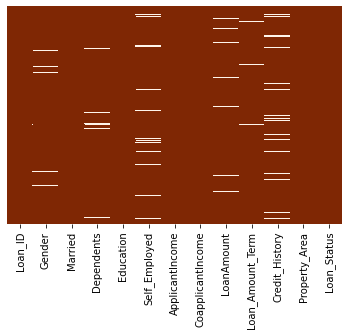

In [180]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'Oranges_r')

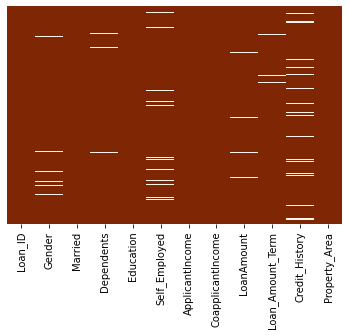

In [181]:
sns.heatmap(df1.isnull(),cbar=False,yticklabels=False,cmap = 'Oranges_r')

Sehingga setelah dilakukan pengecekan untuk missing data maka dari kedua dataset ditemukan missing data. 

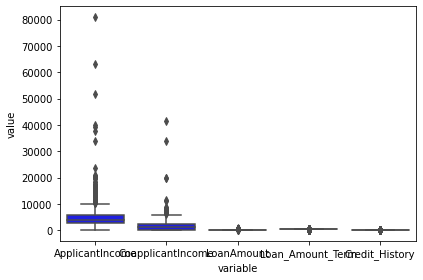

In [182]:
#mengecek outlier
df_1=df.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='blue',orient='v', data=pd.melt(df_1))
plt.tight_layout()

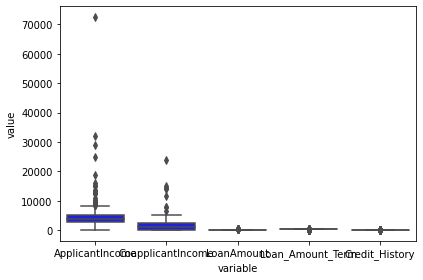

In [183]:
#Mengecek outlier
df_11=df1.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='blue',orient='v', data=pd.melt(df_11))
plt.tight_layout()


Sehingga setelah dilakukan pengecekan oulier maka pada kedua dataset ditemukan outlier. 

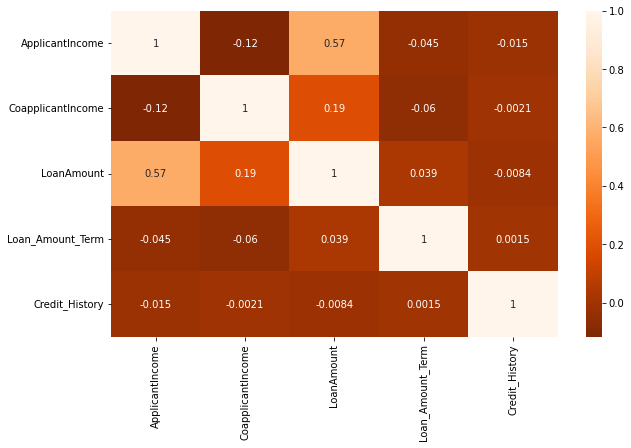

In [184]:
#melihat korelasi data
k = len(df.columns)
cm = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'Oranges_r')

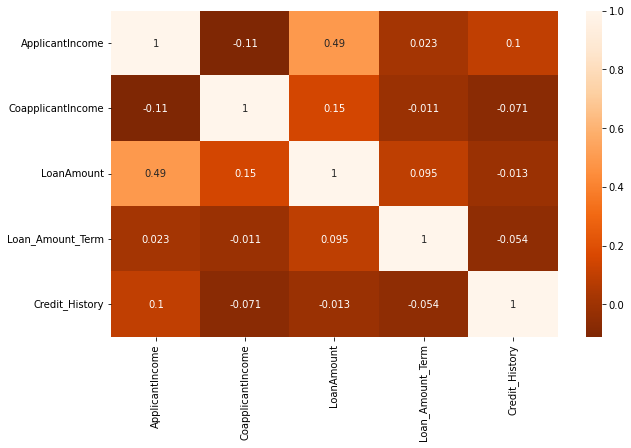

In [185]:
k = len(df1.columns)
cm = df1.corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'Oranges_r')

dari tabel korelasi diatas dapat disimpulkan bahwa untuk korelasi yang semakin negatif ditunjukkan oleh warna yang semakin gelap, sedangkan untuk korelasi yang semakin positif ditunjukkan oleh warna yang semakin terang.

In [186]:
#melihat statistik data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [187]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [188]:
#plot distribusi data numerik
df = df.drop(columns=['Loan_ID']) ## Dropping Loan ID
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [189]:
df.Gender = df.Gender.replace({"Male": 1, "Female" : 0})

df.Married = df.Married.replace({"Yes": 1, "No" : 0})

df.Dependents = df.Dependents.replace({"0": 0, "1" : 1, "2" : 2, "3+" : 3})

df.Education = df.Education.replace({"Graduate": 1, "Not Graduate" : 0})

df.Self_Employed = df.Self_Employed.replace({"Yes": 1, "No" : 0})

df.Property_Area = df.Property_Area.replace({"Semiurban": 1, "Urban" : 2, "Rural" : 3})

df['Loan_Status'] = df['Loan_Status'].replace(['Y','N'],[1,0])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

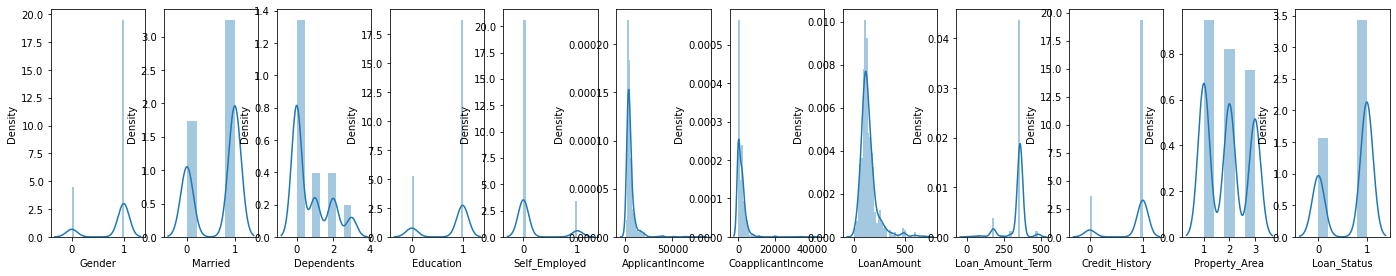

In [190]:
l = df.columns.values
number_of_columns=len(df.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

In [191]:
df1 = df1.drop(columns=['Loan_ID']) ## Dropping Loan ID
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [192]:
df1.Gender = df1.Gender.replace({"Male": 1, "Female" : 0})

df1.Married = df1.Married.replace({"Yes": 1, "No" : 0})

df1.Dependents = df1.Dependents.replace({"0": 0, "1" : 1, "2" : 2, "3+" : 3})

df1.Education = df1.Education.replace({"Graduate": 1, "Not Graduate" : 0})

df1.Self_Employed = df1.Self_Employed.replace({"Yes": 1, "No" : 0})

df1.Property_Area = df1.Property_Area.replace({"Semiurban": 1, "Urban" : 2, "Rural" : 3})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

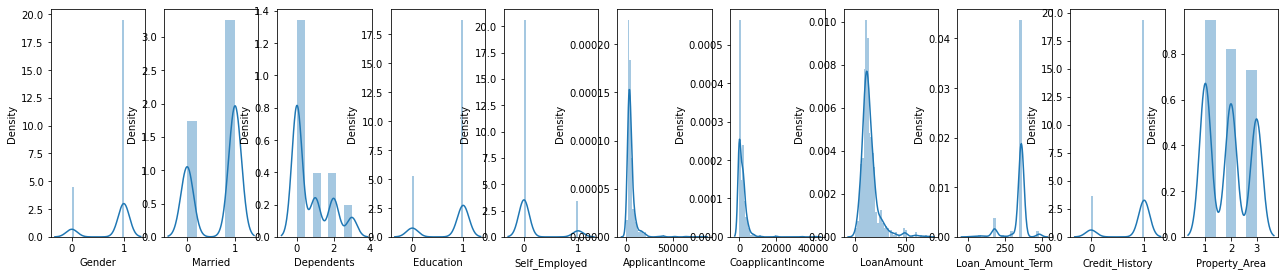

In [193]:
l = df1.columns.values
number_of_columns=len(df1.columns)
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True)

Sehingga dari plot distribusi data numerik diatas dapat disimpulkan bahwa kedua dataset tidak normal.

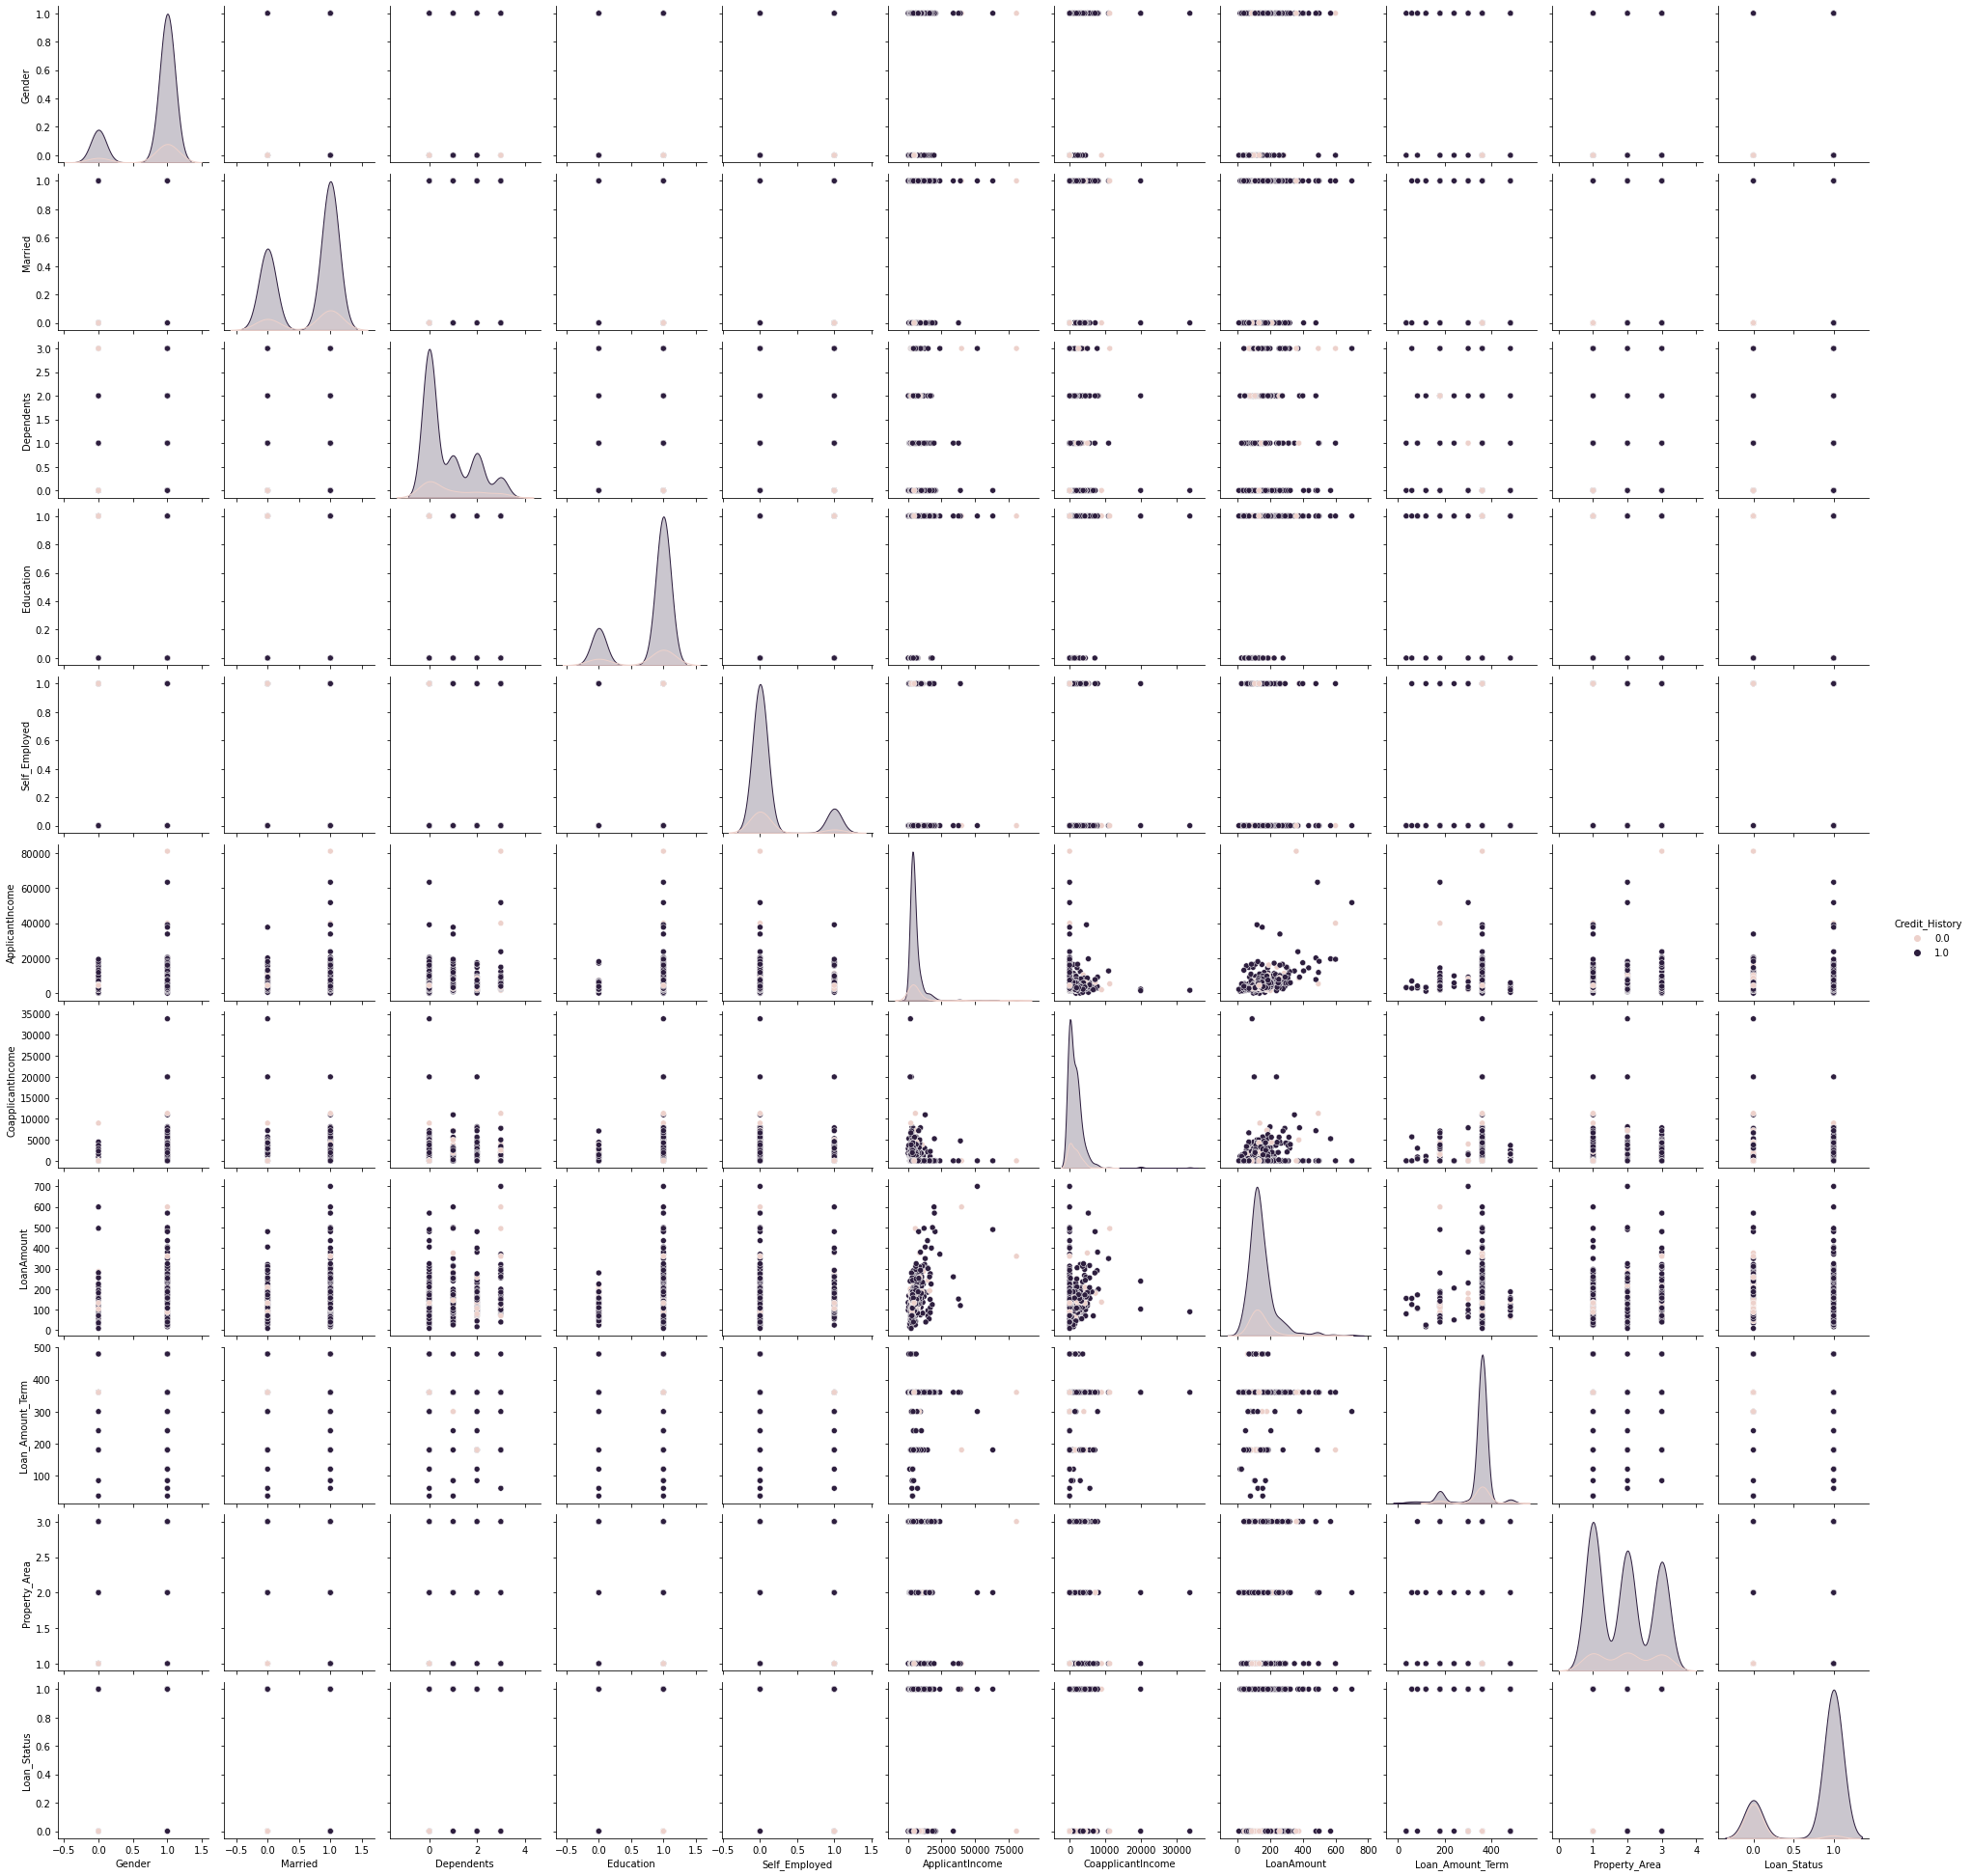

In [194]:
#pairplot
p = sns.pairplot(df, hue="Credit_History")

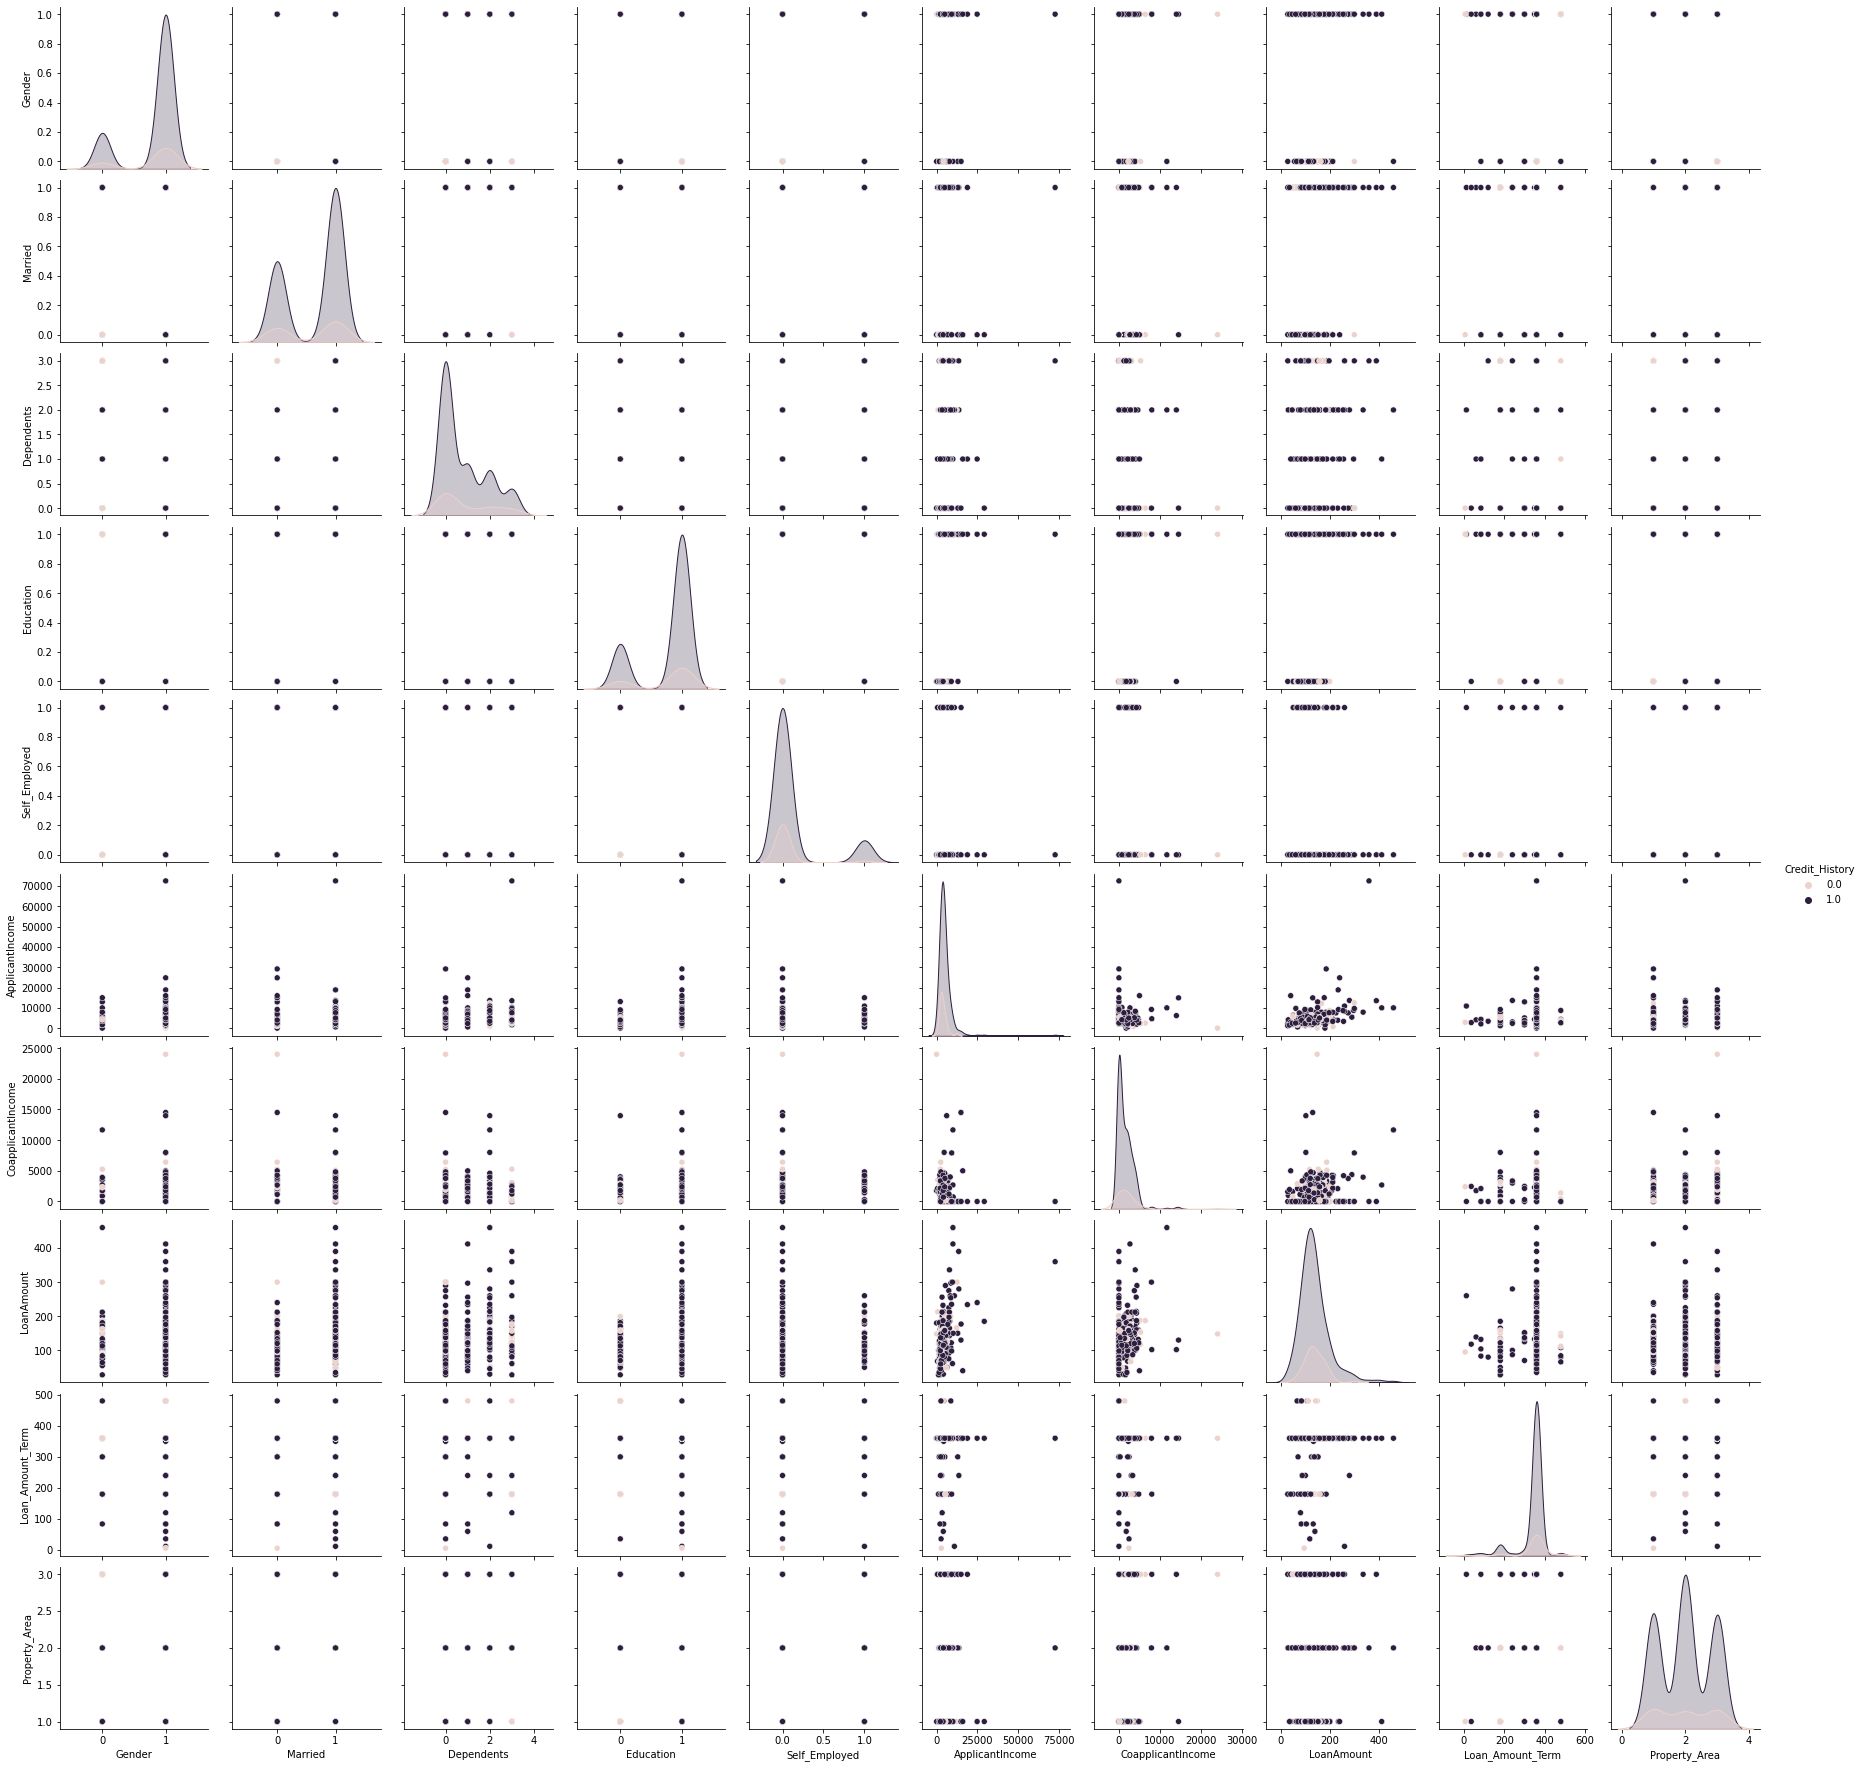

In [195]:
p = sns.pairplot(df1, hue="Credit_History")

#**PERTANYAAN KEEMPAT**#

 Lakukan Data Preprocesing pada data yang Anda peroleh sebagai berikut:

 A. Lakukan standarisasi nama kolom

 B. Adakah data kosong pada data yang Anda miliki

C. Adakah data kosong pada data yang Anda miliki?

D. Lakukan plot histogram distribusi pada setiap fitur pada data Anda.

E. Lakukan Pemilihan Kolom/Baris yang Digunakan untuk pemodelaN

F. lakukan pembagian data training 
dan testing dengan perbandingan 80:20

**JAWAB**

**DATA PREPROCESSING**

**a. Lakukan standarisasi nama kolom yaitu menggunakan huruf kecil dan spasi diganti dengan garis bawah.**

**STANDARIZE COLUMN NAMES**

In [196]:
#Dataset train sebelum distandarisasi
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1


In [197]:
#Dataset test sebelum distandarisasi
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,2
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2


In [198]:
#change upper to lower
dfnew=df.rename(columns=str.lower)

In [199]:
#change upper to lower
df1new=df1.rename(columns=str.lower)

In [200]:
#datatrain setelah distandarisasi
dfnew

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [201]:
#datatest setelah distandarisasi
df1new

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
3,1.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,2
4,1.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1.0,1,3.0,0,1.0,4009,1777,113.0,360.0,1.0,2
363,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1.0,2
364,1.0,0,0.0,1,0.0,3250,1993,126.0,360.0,NaN,1
365,1.0,1,0.0,1,0.0,5000,2393,158.0,360.0,1.0,3


**b. Adakah data kosong pada data yang anda miliki? jika ada lakukan pengisian data kosong. Tuliskan alasan anda meengapa anda memilih sebuah cara tertentu untuk mengisi data kosong terebut.**

Pada soal nomer 3 terlihat bahwa kedua dataset memiliki data kosong atau NaN, sehingga dilakukan pembersihan NaN dengan diterapkan mean, median, dan modus.

In [202]:
dfnew['gender'].fillna(dfnew['gender'].mode()[0], inplace=True)

dfnew['married'].fillna(dfnew['married'].mode()[0], inplace=True)

dfnew['dependents'].fillna(dfnew['dependents'].mode()[0], inplace=True)

dfnew['self_employed'].fillna(dfnew['self_employed'].mode()[0], inplace=True)

dfnew['loanamount'].fillna(dfnew['loanamount'].mean(), inplace=True) # Mean

dfnew['loan_amount_term'].fillna(dfnew['loan_amount_term'].mode()[0], inplace=True)

dfnew['credit_history'].fillna(dfnew['credit_history'].mean(), inplace=True)

dfnew.isna().sum() #cek missing data

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [203]:
df1new['gender'].fillna(df1new['gender'].mode()[0], inplace=True)

df1new['married'].fillna(df1new['married'].mode()[0], inplace=True)

df1new['dependents'].fillna(df1new['dependents'].mode()[0], inplace=True)

df1new['self_employed'].fillna(df1new['self_employed'].mode()[0], inplace=True)

df1new['loanamount'].fillna(df1new['loanamount'].mean(), inplace=True) # Mean

df1new['loan_amount_term'].fillna(df1new['loan_amount_term'].mode()[0], inplace=True)

df1new['credit_history'].fillna(df1new['credit_history'].mean(), inplace=True)

df1new.isna().sum() #cek missing data 

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
dtype: int64

Setelah dilakukan pengisian data kosong dengan menggunakan mean,median,modus. maka sudah tidak ditemukan lagi data kosong di kedua dataset. 

Pengisian data kosong dengan menggunakan mean, median, modus ini dilakukan karena data kosong yang ditemukan merupakan data numerik (integer,float) yang bisa dihitung mean,median,modusnya sehingga hasilnya dapat mengisi data kosong tersebut. 

**c. Adakah outlier pada data yang anda miliki? Jika adaa lakukan penghapusan outlier!**

Pada EDA diatas sudah diketahui bahwa terdapat outlier pada kedua dataset. sehingga dengan menggunakan rumus IQR outlier tersebut akan dibuang. 

In [204]:
#Menghitung Skor IQR
sorted(df)

Q1=dfnew.quantile(0.25)
Q3=dfnew.quantile(0.75)
IQR=Q3-Q1
print(IQR)

gender                  0.00
married                 1.00
dependents              1.00
education               0.00
self_employed           0.00
applicantincome      2917.50
coapplicantincome    2297.25
loanamount             64.50
loan_amount_term        0.00
credit_history          0.00
property_area           2.00
loan_status             1.00
dtype: float64


In [205]:
#Menghapus Outlier
dfnew_clear = dfnew[~((dfnew < (Q1 - 1.5 * IQR)) |(dfnew > (Q3 + 1.5 * IQR))).any(axis=1)]
dfnew_clear


,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,3,0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,2,1
8,1.0,1.0,2.0,1,0.0,4006,1526.0,168.000000,360.0,1.0,2,1
10,1.0,1.0,2.0,1,0.0,3200,700.0,70.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
603,1.0,0.0,0.0,1,0.0,3676,4301.0,172.000000,360.0,1.0,3,1
606,1.0,1.0,1.0,1,0.0,3400,2500.0,173.000000,360.0,1.0,1,1
608,1.0,1.0,0.0,1,0.0,3232,1950.0,108.000000,360.0,1.0,3,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.000000,360.0,1.0,2,1


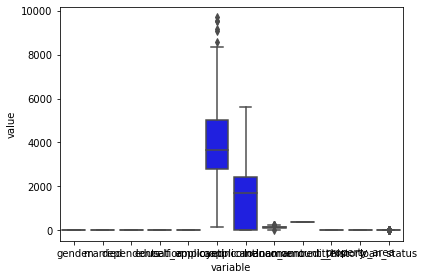

In [206]:
dfnew_clear=dfnew_clear.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='blue',orient='v', data=pd.melt(dfnew_clear))
plt.tight_layout()

In [207]:
#Menghitung Skor IQR
sorted(df1)

Q1=df1new.quantile(0.25)
Q3=df1new.quantile(0.75)
IQR=Q3-Q1
print(IQR)

gender                  0.0
married                 1.0
dependents              2.0
education               0.0
self_employed           0.0
applicantincome      2196.0
coapplicantincome    2430.5
loanamount             56.5
loan_amount_term        0.0
credit_history          0.0
property_area           2.0
dtype: float64


In [208]:
#Menghapus Outlier
dfnew_clear1 = df1new[~((df1new < (Q1 - 1.5 * IQR)) |(df1new > (Q3 + 1.5 * IQR))).any(axis=1)]
dfnew_clear1

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,1.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,2
1,1.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,2
2,1.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,2
11,1.0,1,1.0,1,0.0,2185,1516,162.0,360.0,1.0,1
15,1.0,0,1.0,1,0.0,5667,0,131.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
357,1.0,0,0.0,1,0.0,2500,0,60.0,360.0,1.0,2
359,1.0,0,0.0,1,0.0,4000,2667,152.0,360.0,1.0,1
361,1.0,1,1.0,1,0.0,2269,2167,99.0,360.0,1.0,1
363,1.0,1,0.0,1,0.0,4158,709,115.0,360.0,1.0,2


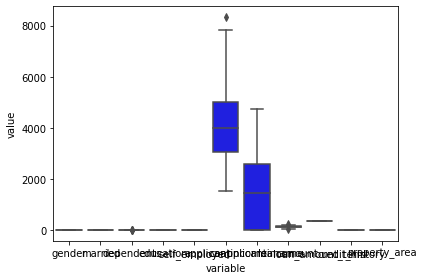

In [209]:
dfnew_clear1=dfnew_clear1.select_dtypes(include=['float64', 'int64'])#Memilih kolom numerik

sns.boxplot(x="variable", y="value", color='blue',orient='v', data=pd.melt(dfnew_clear1))
plt.tight_layout()

setelah menerapan rumus IQR unttuk membuang outlier maka sudah tidak ditemukan lagi outlier pada kedua dataset.

**d.Lakukakan plot histogram distribusi pada setap fitur pada data anda. Jika terindikasi bukan berdistribusi normal. Lakukan normalisasi pada fitur tersebut!**

Sudah diketahui pada soal nomor 3 bahwa kedua dataset tidak normal sehingga akan dilakkan normalisasi dengan menggunakan standardscaler.

In [210]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

columns_for_scaling = ['applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term']

dfnew_clear[columns_for_scaling] = standardScaler.fit_transform(dfnew_clear[columns_for_scaling])

dfnew_clear

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1.0,0.0,0.0,1,0.0,0.957799,-1.118370,0.233602,0.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,0.267521,-0.061399,-0.171433,0.0,1.0,3,0
4,1.0,0.0,0.0,1,0.0,1.040130,-1.118370,0.114544,0.0,1.0,2,1
8,1.0,1.0,2.0,1,0.0,-0.047084,-0.048782,0.708496,0.0,1.0,2,1
10,1.0,1.0,2.0,1,0.0,-0.486550,-0.627733,-1.447330,0.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
603,1.0,0.0,0.0,1,0.0,-0.227014,1.896241,0.796489,0.0,1.0,3,1
606,1.0,1.0,1.0,1,0.0,-0.377501,0.633903,0.818487,0.0,1.0,1,1
608,1.0,1.0,0.0,1,0.0,-0.469102,0.248403,-0.611398,0.0,1.0,3,1
611,1.0,1.0,1.0,1,0.0,2.169874,-0.950152,2.578345,0.0,1.0,2,1


In [211]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

columns_for_scaling = ['applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term']

dfnew_clear1[columns_for_scaling] = standardScaler.fit_transform(dfnew_clear1[columns_for_scaling])

dfnew_clear1

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
0,1.0,1,0.0,1,0.0,1.066478,-1.030827,-0.701238,0.0,1.0,2
1,1.0,1,1.0,1,0.0,-0.776689,0.001285,-0.253122,0.0,1.0,2
2,1.0,1,2.0,1,0.0,0.564557,0.207707,2.043470,0.0,1.0,2
11,1.0,1,1.0,1,0.0,-1.397816,0.012294,0.755138,0.0,1.0,1
15,1.0,0,1.0,1,0.0,1.029531,-1.030827,-0.113086,0.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
357,1.0,0,0.0,1,0.0,-1.178226,-1.030827,-2.101598,0.0,1.0,2
359,1.0,0,0.0,1,0.0,-0.132556,0.804267,0.475066,0.0,1.0,1
361,1.0,1,1.0,1,0.0,-1.339259,0.460230,-1.009317,0.0,1.0,1
363,1.0,1,0.0,1,0.0,-0.022412,-0.542982,-0.561201,0.0,1.0,2


setelah dilakukan normalisasi dengan standardscaler maka pada kedua dataset sudah normal. 

**e. Lakukan pemilihan kolom/baris yang digunakan untuk pemodelan![Boleh memilih kolom/baris untuk meningkatkan kualitas model]**

In [212]:
X = dfnew_clear.drop(['loan_status'], axis =1)
y = dfnew_clear['loan_status']

In [213]:
sf = ['credit_history', 'education','self_employed','applicantincome']

**f. Jika data Anda belum dibagi manjadi data Training & Testing, lakukan pembagian data training dan testing dengan perbandingan 80:20!**

dataset sudah terbagi menjadi data training dan data testing, namun belum terbagi menjadi vector x_train, y_train dan x-test. sehingga akan dibagi sebagai berikut :

In [214]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 142)

#**PERTANYAAN KELIMA**#

Tuliskan Dasar Teori Model Klasifikasi [Ide Dasar dan Algoritma] yang Anda pilih beserta 
contoh kalkulasi manualnya.

**JAWAB**

**Ide Dasar dan Algoritma SVM (Suport Vector Machine) dan kalkulasi manualnya**

Support Vector Machine atau (SVM) merupakan model machine learning multifungsi yang dapat digunakan untuk menyelesaikan permasalahan regresi, klasifikasi, dan pendeteksian outlier. Yang termasuk ke dalam kategori supervised learning, dimana SVM merupakan salah satu metode yang paling populer dalam machine learning (ML). Dimana secara sederhana digambarkan sebagai upaya untuk menemukan hyperplane terbaik, yang berfungsi sebagai pemisah dua kelas data di ruang input. 

Teknik ini biasa digunakan untuk mendapatkan fungsi pemisah yang optimal (hyperplane) untuk memisahkan pengamatan dengan nilai variabel target yang berbeda. Untuk menentukan batas keputusan, yaitu model linier atau hyperplane dengan parameter bobot dan bias, SVM menggunakan konsep margin yang didefinisikan sebagai jarak terdekat antara batas keputusan dan data latih. Kita bisa mendapatkan batasan keputusan tertentu dengan memaksimalkan margin.


Keuntungan dari mesin support vector adalah:

- Efektif dalam ruang dimensi tinggi.

- Masih efektif dalam kasus di mana jumlah dimensi lebih besar dari jumlah sampel.

- Menggunakan subset titik pelatihan dalam fungsi keputusan (disebut vektor pendukung), sehingga juga hemat memori.

- Serbaguna: fungsi Kernel yang berbeda dapat ditentukan untuk fungsi keputusan. Kernel umum disediakan, tetapi juga dimungkinkan untuk menentukan kernel khusus.

Kekurangan dari mesin vektor meliputi:

- Jika jumlah fitur jauh lebih besar daripada jumlah sampel,maka hindari kecocokan berlebihan dalam memilih fungsi Kernel dan istilah regularisasi sangat penting.

- SVM secara teorik dikembangkan untuk program klasifikasi dengan dua class atau lebih. Namun demikian, masing-masing strategi ini memiliki kelemahan, sehingga dapat dikatakan penelitian dan pengembangan SVM pada multiclass problem masih merupakan tema penelitian yang terbuka.

Gambar dibawah ini merupakan visualisasi tentang cara kerja metode SVM :

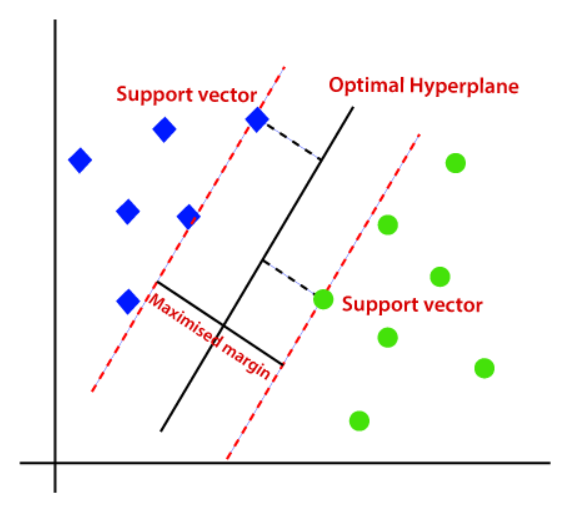

**Linear separability dan Non-linear separability**

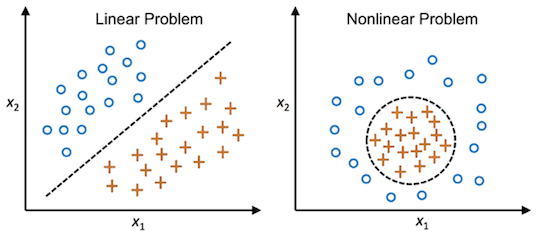

Dimana pembeda antara keduanya yaitu untuk Linear separability merupakan Dataset yang dimana dapat dipisahkan secara linier jika setidaknya ada satu baris yang membedakan kelas dengan jelas. atau dengan kata lain merupakan data yang dapat dipisahkan secara linier. Misalkan { x n , . . . , x 1 } adalah dataset dan y i ∈ { + 1 , − 1 } adalah label kelas dari data x i . Pada gambar 1 dapat dilihat berbagai alternatif bidang pemisah yang dapat memisahkan semua data set sesuai dengan kelasnya. Namun, bidang pemisah terbaik tidak hanya dapat memisahkan data tetapi juga memiliki margin paling besar. sedangkan Non-linear separability adalah suatu kumpulan data yang dikatakan tidak dapat dipisahkan secara linier jika tidak ada satu baris pun yang secara jelas membedakan kelas-kelasnya.

**Algoritma Model**

**Tahapan dan perhitungan algoritma SVM**

1. memvisualisasikan data
2. meminimalkan nilai margin
3. mencari persamaan hyperplane
4. memvisualisasi hyperplane
5. melakukan pengujian data
6. melakukan klasifikasi

**Contoh Manual SVM:**

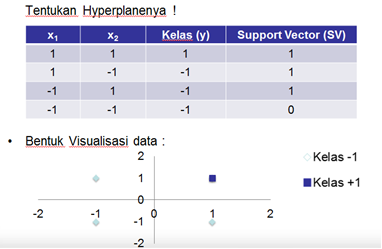

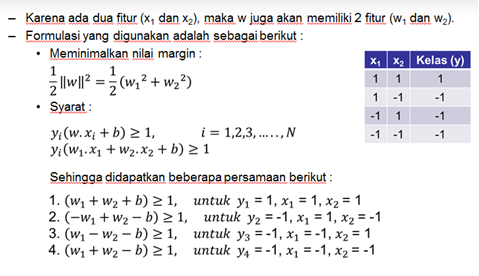

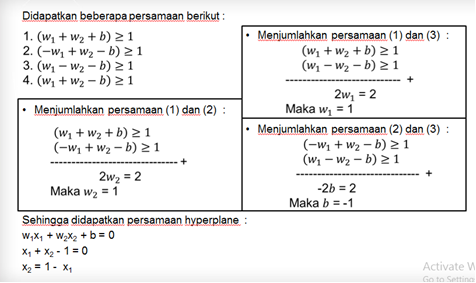

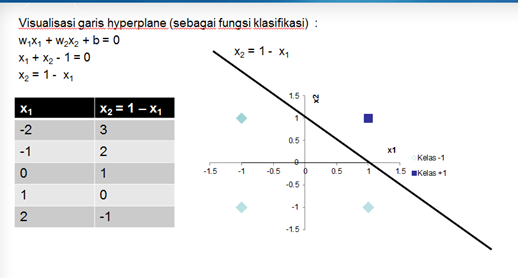

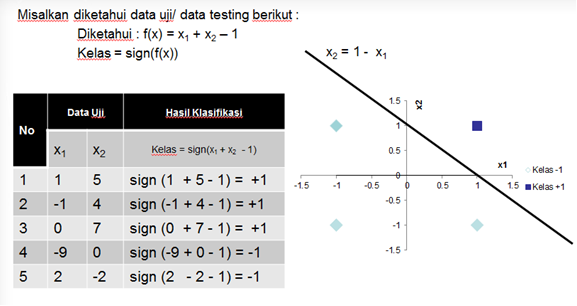

**Sumber :**

https://www.analyticsvidhya.com/blog/2021/07/svm-support-vector-machine-algorithm/

https://cahyadsn.phpindonesia.id/extra/svm.php#:~:text=SVM%20pada%20Linearly%20Separable%20Data%20Linearly%20separable%20data,adalah%20label%20kelas%20dari%20data%20xi%20x%20i.

https://www.youtube.com/watch?v=Y7lnvjMkYkA

#**PERTANYAAN KEENAM**#

Lakukan pemodelan Klasifikasi dengan kriteria: (Accuracy > 0.8 atau Recall>0.8, atau 
Precision > 0.8, atau F1 Score > 0.8). Catatan: Kriteria dipilih bergantung pada case yang 
dipilih. Lebih aman menggunakan patokan F1 Score.

In [215]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [216]:
svm=SVC()
svm.fit(X_train,y_train)
svm_pred=svm.predict(X_test)

print("Accuracy {}".format(metrics.accuracy_score(y_test, svm_pred)))
print("Recall/Sensitivity {}".format(metrics.recall_score(y_test, svm_pred)))
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test, svm_pred))

Accuracy 0.8421052631578947
Recall/Sensitivity 1.0
[[ 0  9]
 [ 0 48]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.84      1.00      0.91        48

    accuracy                           0.84        57
   macro avg       0.42      0.50      0.46        57
weighted avg       0.71      0.84      0.77        57



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dari hasil penerapan model suport vector machine diatas diperoleh hasil akurasi sebesar  84%.

#**PERTANYAAN KETUJUH**#

Lakukan simulasi pemodelan pada data uji yang anda miliki!

**JAWAB**

In [217]:
test_sv_predict = svm.predict(X_test)
test_sv_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])